<a href="https://colab.research.google.com/github/Hamedsamak66/MNIST/blob/main/Mnist-With-Hyperparameter-Tuning-heuristic-algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow keras deap mealpy scikit-optimize pyswarm matplotlib sklearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Using cached deap-1.4.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (135 kB)
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  ×

In [5]:
!pip install deap
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from deap import base, creator, tools, algorithms
import random
from keras.models import Sequential
from keras.layers import Activation, Dense



  Using cached deap-1.4.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (135 kB)


In [9]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
scaler = MinMaxScaler()
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Further split training data for validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [10]:
# Define the evaluation function
def evaluate_ga(individual):
    selected_features = [i for i in range(len(individual)) if individual[i] == 1]
    if len(selected_features) == 0:
        return 0,
    x_train_fs = x_train[:, selected_features]
    x_val_fs = x_val[:, selected_features]
    model = Sequential([
        Dense(128, activation='relu', input_shape=(x_train_fs.shape[1],)),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train_fs, y_train, epochs=3, batch_size=32, verbose=0)
    loss, accuracy = model.evaluate(x_val_fs, y_val, verbose=0)
    return accuracy,

# Setup GA
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, len(x_train[0]))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate_ga)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run GA for feature selection
population = toolbox.population(n=10)
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)

# Extract the best individual
best_ind = tools.selBest(population, 1)[0]
selected_features_ga = [i for i in range(len(best_ind)) if best_ind[i] == 1]
print(f"Selected Features (GA): {selected_features_ga}")

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	10    
1  	4     
2  	5     
3  	7     
4  	6     
5  	8     
6  	4     
7  	5     
8  	6     
9  	8     
10 	6     
Selected Features (GA): [1, 2, 3, 6, 8, 14, 17, 18, 19, 20, 24, 25, 29, 30, 40, 41, 42, 43, 45, 46, 48, 51, 52, 53, 54, 55, 58, 61, 76, 79, 82, 85, 87, 90, 91, 92, 96, 97, 101, 102, 104, 106, 109, 110, 113, 114, 116, 119, 121, 124, 126, 128, 129, 130, 133, 138, 141, 149, 150, 152, 155, 156, 158, 159, 160, 165, 167, 169, 171, 174, 175, 180, 182, 183, 184, 189, 190, 191, 192, 195, 197, 198, 199, 200, 201, 203, 205, 206, 209, 211, 214, 216, 218, 219, 223, 231, 232, 233, 237, 239, 240, 241, 243, 244, 245, 248, 249, 250, 251, 252, 256, 257, 258, 260, 261, 262, 263, 264, 266, 268, 271, 272, 277, 278, 281, 283, 287, 288, 289, 290, 291, 292, 293, 294, 295, 299, 301, 304, 307, 308, 310, 312, 314, 317, 318, 319, 320, 323, 324, 325, 327, 328, 329, 330, 332, 334, 336, 338, 339, 340, 342, 344, 345, 346, 347, 348, 351, 353, 355, 360, 362, 363, 364, 365, 367, 368, 369, 3

In [15]:
!pip install mealpy
!pip install pyswarm
from pyswarm import pso
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the evaluation function for PSO
def evaluate_pso(params):
    num_units, learning_rate = params
    num_units = int(num_units)

    model = Sequential([
        Dense(num_units, activation='relu', input_shape=(len(selected_features_ga),)),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train_fs, y_train, epochs=3, batch_size=32, verbose=0)
    loss, accuracy = model.evaluate(x_val_fs, y_val, verbose=0)
    return -accuracy  # PSO minimizes, so we use negative accuracy

# Setup PSO for hyperparameter optimization
x_train_fs = x_train[:, selected_features_ga]
x_val_fs = x_val[:, selected_features_ga]
lb = [32, 0.0001]  # lower bounds for units and learning rate
ub = [128, 0.01]   # upper bounds for units and learning rate

best_params_pso, best_accuracy_pso = pso(evaluate_pso, lb, ub, swarmsize=10, maxiter=10)

print(f"Best Parameters (PSO): {best_params_pso}")
print(f"Best Accuracy (PSO): {-best_accuracy_pso}")

  Using cached pyswarm-0.6.tar.gz (4.3 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=fbf7dcb7700ad11bab9ccd60eb8adbc496f86f1c33116fb8b43a0ca7ae1f6ddb
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm
Stopping search: maximum iterations reached --> 10
Best Parameters (PSO): [1.12147277e+02 2.18442971e-03]
Best Accuracy (PSO): 0.9751666784286499


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train_fs, y_train)
y_pred_lr = lr_model.predict(x_val_fs)
lr_accuracy = accuracy_score(y_val, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train_fs, y_train)
y_pred_rf = rf_model.predict(x_val_fs)
rf_accuracy = accuracy_score(y_val, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Support Vector Machine
svm_model = SVC()
svm_model.fit(x_train_fs, y_train)
y_pred_svm = svm_model.predict(x_val_fs)
svm_accuracy = accuracy_score(y_val, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

# Optimized Neural Network
best_units, best_lr = best_params_pso
best_units = int(best_units)
nn_model = Sequential([
    Dense(best_units, activation='relu', input_shape=(len(selected_features_ga),)),
    Dense(10, activation='softmax')
])
nn_model.compile(optimizer=Adam(learning_rate=best_lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn_model.fit(x_train_fs, y_train, epochs=3, batch_size=32, verbose=0)
nn_accuracy = nn_model.evaluate(x_val_fs, y_val, verbose=0)[1]
print(f"Optimized NN Accuracy: {nn_accuracy:.4f}")


Logistic Regression Accuracy: 0.9205
Random Forest Accuracy: 0.9647
SVM Accuracy: 0.9788
Optimized NN Accuracy: 0.9737


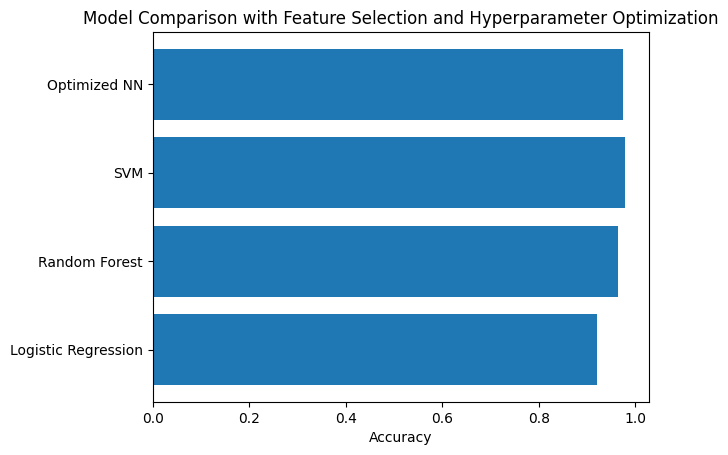

In [17]:
import matplotlib.pyplot as plt

# Plot accuracies
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Optimized NN']
accuracies = [lr_accuracy, rf_accuracy, svm_accuracy, nn_accuracy]

plt.barh(model_names, accuracies)
plt.xlabel('Accuracy')
plt.title('Model Comparison with Feature Selection and Hyperparameter Optimization')
plt.show()